In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Make plots look better
plt.style.use("seaborn-v0_8-darkgrid")


In [7]:
from google.colab import files
uploaded = files.upload()



Saving SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv to SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv


In [8]:
import pandas as pd

df = pd.read_csv('SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv')
print("Columns:", df.columns)
df.head()


Columns: Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


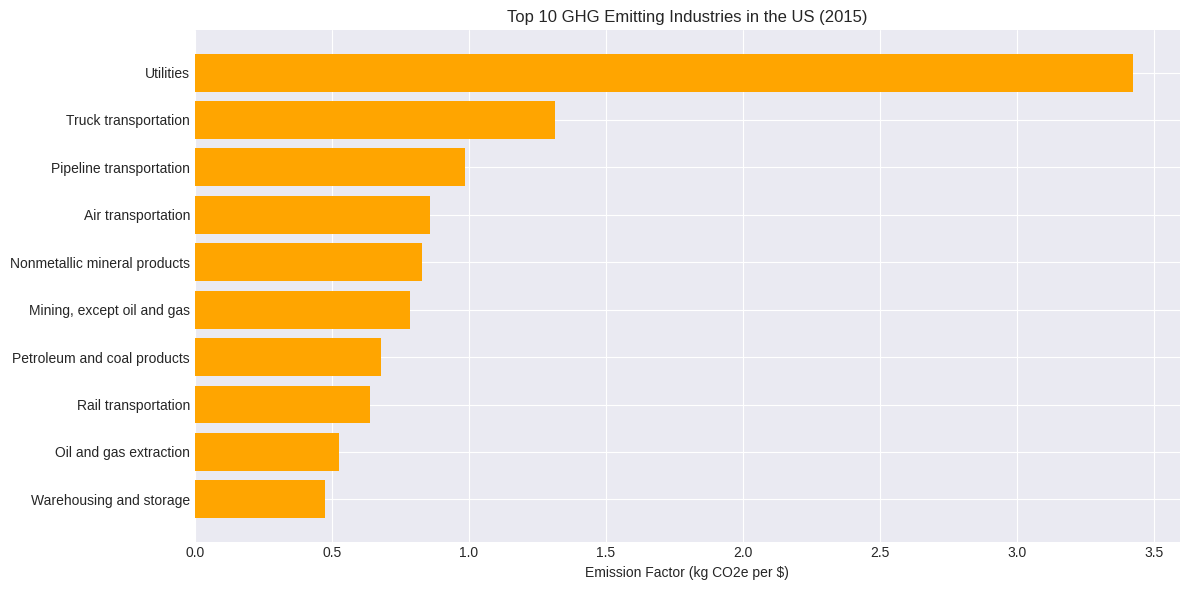

In [9]:
import matplotlib.pyplot as plt

# Sort industries by emission factor
df_sorted = df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)

# Select Top 10
top_10 = df_sorted.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10['Industry Name'], top_10['Supply Chain Emission Factors with Margins'], color='orange')
plt.xlabel('Emission Factor (kg CO2e per $)')
plt.title('Top 10 GHG Emitting Industries in the US (2015)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [10]:
# Select only useful columns
df_clean = df[['Industry Name', 'Supply Chain Emission Factors with Margins']].dropna()

# Encode industry names to numbers
df_clean['Industry_Code'] = df_clean['Industry Name'].astype('category').cat.codes

# Define features (X) and target (y)
X = df_clean[['Industry_Code']]
y = df_clean['Supply Chain Emission Factors with Margins']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [13]:
import numpy as np

print("Model Evaluation Results:")
print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred):.4f}")
print(f"Random Forest R² Score: {r2_score(y_test, rf_pred):.4f}")

# Use numpy to calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")


Model Evaluation Results:
Linear Regression R² Score: -0.0834
Random Forest R² Score: -0.4656
Linear Regression RMSE: 0.1538
Random Forest RMSE: 0.1789


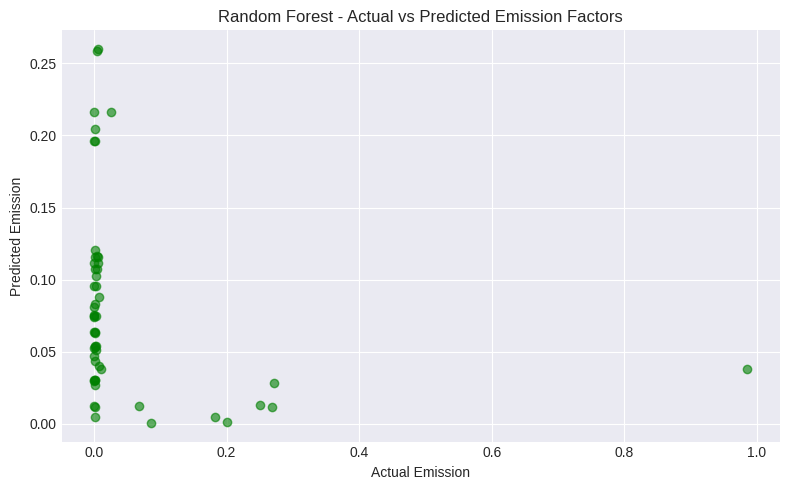

In [14]:
# Actual vs Predicted (Random Forest)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.xlabel("Actual Emission")
plt.ylabel("Predicted Emission")
plt.title("Random Forest - Actual vs Predicted Emission Factors")
plt.grid(True)
plt.tight_layout()
plt.show()


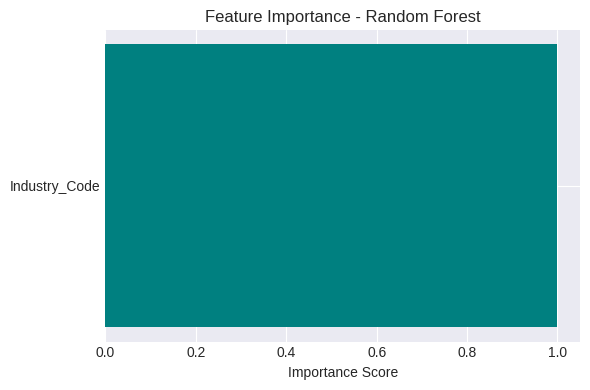

In [15]:
importances = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(['Industry_Code'], importances, color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [16]:
df.columns


Index(['Industry Code', 'Industry Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins'],
      dtype='object')

In [17]:
# Select feature columns and target
features = [
    'Margins of Supply Chain Emission Factors',
    'DQ ReliabilityScore of Factors without Margins',
    'DQ TemporalCorrelation of Factors without Margins',
    'DQ GeographicalCorrelation of Factors without Margins',
    'DQ TechnologicalCorrelation of Factors without Margins',
    'DQ DataCollection of Factors without Margins'
]

target = 'Supply Chain Emission Factors with Margins'

# Drop rows with missing values in selected columns
df_model = df[features + [target]].dropna()

# Features and target split
X = df_model[features]
y = df_model[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("📊 Evaluation Results with Quality Metrics:")
print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred):.4f}")
print(f"Random Forest R² Score: {r2_score(y_test, rf_pred):.4f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")


📊 Evaluation Results with Quality Metrics:
Linear Regression R² Score: -0.1319
Random Forest R² Score: -0.7562
Linear Regression RMSE: 0.1572
Random Forest RMSE: 0.1958


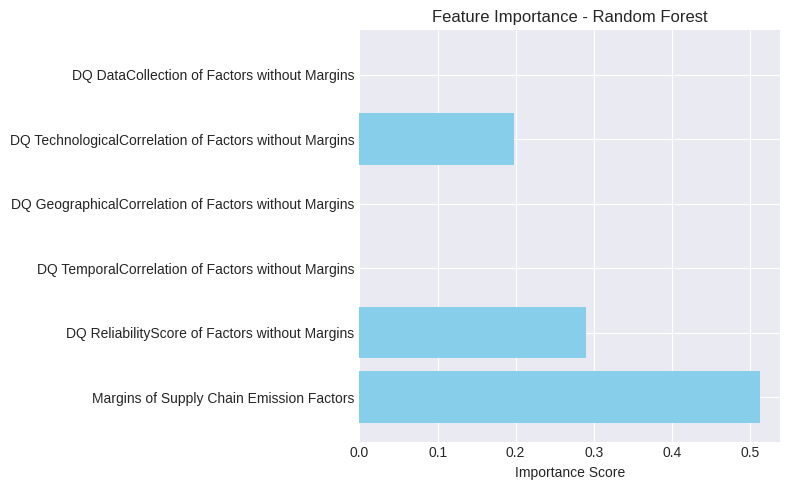

In [20]:
import matplotlib.pyplot as plt

# Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [21]:
import joblib
joblib.dump(rf, 'best_model_rf.pkl')


['best_model_rf.pkl']